[[11169     0     0     0     0     0     0     0     0     0]
 [    0   262     7     9    10    35     3    28     6     0]
 [    0   244   109     0     9     3     0    27     1     0]
 [    0   328    27  2457   332   335    15    37    39     0]
 [    0     3     0     5   174    49     0     0     2     0]
 [    0   333    11    42    19  1632     2    33    26     0]
 [    0  2237   322   346   266   427  2452   255   461     6]
 [    0  1657    87    60    94    84   164   179    45     0]
 [    0     0     0     1     1     2     0     0    21     0]
 [    0    53     7    25    15    85    53    11    22  7808]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11169
           1       0.05      0.73      0.10       360
           2       0.19      0.28      0.23       393
           3       0.83      0.69      0.75      3570
           4       0.19      0.75      0.30       233
           5       0.62      0.78      0.69 

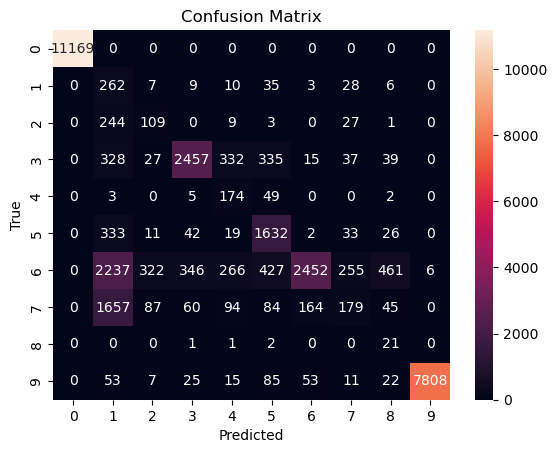

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

# Langkah 1: Memuat dataset
data = pd.read_csv('UNSW_NB15_training-set.csv')

# Langkah 2: Preprocessing
# Mengkodekan fitur kategorikal
categorical_features = ['proto', 'service', 'state']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Simpan encoder untuk penggunaan di masa mendatang

# Mengkodekan kolom target 'attack_cat'
label_encoder = LabelEncoder()
data['attack_cat'] = label_encoder.fit_transform(data['attack_cat'])

# Menangani nilai NaN yang mungkin ada di dataset
# data.dropna(inplace=True)

# Skalasi fitur numerik
scaler = StandardScaler()
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('attack_cat')  # Jangan skalakan kolom target 'attack_cat'
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Langkah 3: Memisahkan data
# Hapus 'id' jika tidak diperlukan dan memastikan tidak ada kolom lain yang tidak relevan
X = data.drop(['attack_cat', 'id'], axis=1)
y = data['attack_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#cari referensi dari jurnal


# Langkah 4: Setup Pipeline
# Menambahkan class_weight='balanced' untuk menangani kelas yang tidak seimbang
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm.SVC(kernel='linear', class_weight='balanced'))
])

# Langkah 5: Evaluasi model
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Menampilkan confusion matrix dan classification report
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
print(classification_report(y_test, y_pred, zero_division=1))

# Langkah 6: Visualisasi confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



#tampilkan grafik
#ground truth sebagai dasar untuk pembatasan label label untuk memberikan label yag berbeda

#ada grafikk yang tidak perlu menggunakan semua parameter (corelation metrik)